In [ ]:
!pip install xlrd
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

## 노인 인구수(단위: 천 명)

In [ ]:
# 노인 인구수
old_num_of_people = pd.read_excel('/content/drive/Shareddrives/deepDaiv/dataFile/2020_지역별_노인인구.xlsx')

In [ ]:
old_num_of_people_edit = old_num_of_people

In [ ]:
old_num_of_people_edit.rename(columns={'Unnamed: 0' : '시도명'}, inplace = True)

In [ ]:
old_num_of_people_edit = old_num_of_people_edit[['시도명', 2020]]

In [ ]:
old_num_of_people_edit = old_num_of_people_edit.drop(index=0, axis=0).reset_index()

In [ ]:
old_num_of_people_edit = old_num_of_people_edit.drop(columns='index', axis=0)

In [ ]:
old_num_of_people_edit

,시도명,2020
0,서울,1480
1,부산,625
2,대구,388
3,인천,397
4,광주,204
5,대전,206
6,울산,137
7,세종,32
8,경기,1709
9,강원,302


## 노인 교통사고 건수

In [ ]:
# 노인 교통사고 건수 
old_accident=pd.read_excel('/content/drive/Shareddrives/deepDaiv/dataFile/2020_도로교통공단_노인_교통사고_발생건수.xls')

In [ ]:
old_accident_edit = old_accident.drop(index=19, axis=0)
old_accident_edit['sum'] = old_accident_edit['2020.1'] + old_accident_edit['2020.2']
old_accident_final = old_accident_edit[['시도', 'sum']]
old_accident_final = old_accident_final.drop(index = 0, axis=0)

In [ ]:
old_accident_final = old_accident_final.drop(1, axis=0)

In [ ]:
old_accident_final.rename(columns={'시도' : '시도명'}, inplace = True)
old_accident_final.rename(columns={'sum' : '교통사고건수'}, inplace = True)

In [ ]:
old_accident_final

,시도명,교통사고건수
2,서울,5365
3,부산,2304
4,대구,2187
5,인천,1096
6,광주,1145
7,대전,1229
8,울산,601
9,세종,122
10,경기,7836
11,강원,1637


## 보행노인사고다발지역

In [ ]:
# 보행노인사고다발지역
old_acc_place=pd.read_csv('/content/drive/Shareddrives/deepDaiv/dataFile/보행노인사고다발지역.csv', encoding='cp949')

In [ ]:
#필요한 columns만 추출하여 저장
old_acc_place_edit = old_acc_place[['사고다발지ID', '시도시군구명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수']]

In [ ]:
#사고다발지ID data 변환
old_acc_place_edit = old_acc_place_edit.astype({'사고다발지ID':'str'})

In [ ]:
#2020만 포함된 데이터만 저장
old_acc_place_2020 = old_acc_place_edit[old_acc_place_edit['사고다발지ID'].str.contains('2020')]

In [ ]:
#다른 table과 join하기 위한 value replace
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str[:4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str.replace("특별|광역", '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str.replace("경상북도", '경북')
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str.replace("경상남도", '경남')
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str.replace("전라북도", '전북')
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str.replace("전라남도", '전남')
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str.replace("충청북도", '충북')
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str.replace("충청남도", '충남')
old_acc_place_2020["시도시군구명"] = old_acc_place_2020["시도시군구명"].str.replace("경기도", '경기')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
old_acc_place_2020 = old_acc_place_2020.drop(columns=['사고다발지ID','발생건수'])
old_acc_place_2020['sum'] = old_acc_place_2020.iloc[:, 1:6].sum(axis=1)

In [ ]:
groups = old_acc_place_2020.groupby('시도시군구명')

In [ ]:
old_acc_place_2020_sum = old_acc_place_2020.groupby('시도시군구명').sum().reset_index()

In [ ]:
old_acc_place_2020_final = old_acc_place_2020_sum[['시도시군구명', 'sum']]
old_acc_place_2020_final.rename(columns={'시도시군구명' : '시도명'}, inplace = True)
old_acc_place_2020_final.rename(columns={'sum' : '보행사고다발지역'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
old_acc_place_2020_final["시도명"] = old_acc_place_2020_final["시도명"].str[:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
old_acc_place_2020_final

,시도명,보행사고다발지역
0,강원,126
1,경기,800
2,경남,354
3,경북,236
4,광주,100
5,대구,258
6,대전,100
7,부산,720
8,서울,1330
9,울산,60


## 노인 보호구역

In [ ]:
# 노인 보호구역
old_save_place=pd.read_csv('/content/drive/Shareddrives/deepDaiv/dataFile/전국노인장애인보호구역표준데이터.csv', encoding='cp949')

In [ ]:
old_save_place_region = old_save_place['시도명'].reset_index()
old_save_place_region = old_save_place_region.drop(columns='index')

In [ ]:
old_save_place_region = old_save_place_region.groupby('시도명').size().reset_index()

In [ ]:
old_save_place_region["시도명"] = old_save_place_region["시도명"].str.replace("경상북도", '경북')
old_save_place_region["시도명"] = old_save_place_region["시도명"].str.replace("경상남도", '경남')
old_save_place_region["시도명"] = old_save_place_region["시도명"].str.replace("전라북도", '전북')
old_save_place_region["시도명"] = old_save_place_region["시도명"].str.replace("전라남도", '전남')
old_save_place_region["시도명"] = old_save_place_region["시도명"].str.replace("충청북도", '충북')
old_save_place_region["시도명"] = old_save_place_region["시도명"].str.replace("충청남도", '충남')
old_save_place_region["시도명"] = old_save_place_region["시도명"].str[:2]

In [ ]:
old_save_place_region.rename(columns={0 : '노인보호구역'}, inplace = True)

## 보행자전용도로

In [ ]:
# 보행자 전용 도로
pedestrian=pd.read_csv('/content/drive/Shareddrives/deepDaiv/dataFile/전국보행자전용도로표준데이터.csv', encoding='cp949')

In [ ]:
pedestrian_city = pedestrian['시도명'].reset_index()
pedestrian_city = pedestrian_city.drop(columns='index')
pedestrian_city = pedestrian_city.groupby('시도명').size().reset_index()

In [ ]:
pedestrian_city["시도명"] = pedestrian_city["시도명"].str.replace("경상북도", '경북')
pedestrian_city["시도명"] = pedestrian_city["시도명"].str.replace("경상남도", '경남')
pedestrian_city["시도명"] = pedestrian_city["시도명"].str.replace("전라북도", '전북')
pedestrian_city["시도명"] = pedestrian_city["시도명"].str.replace("전라남도", '전남')
pedestrian_city["시도명"] = pedestrian_city["시도명"].str.replace("충청북도", '충북')
pedestrian_city["시도명"] = pedestrian_city["시도명"].str.replace("충청남도", '충남')
pedestrian_city["시도명"] = pedestrian_city["시도명"].str[:2]

In [ ]:
pedestrian_city.rename(columns={0 : '보행자전용도로'}, inplace = True)

## 전국횡단보도표준데이터

In [ ]:
# 횡단보도
crosswalk = pd.read_csv('/content/drive/Shareddrives/deepDaiv/dataFile/전국횡단보도표준데이터.csv', encoding='cp949')

In [ ]:
crosswalk_city = crosswalk['시도명'].reset_index()
crosswalk_city = crosswalk_city.drop(columns='index')
crosswalk_city = crosswalk_city.groupby('시도명').size().reset_index()

In [ ]:
crosswalk_city["시도명"] = crosswalk_city["시도명"].str.replace("경상북도", '경북')
crosswalk_city["시도명"] = crosswalk_city["시도명"].str.replace("경상남도", '경남')
crosswalk_city["시도명"] = crosswalk_city["시도명"].str.replace("전라북도", '전북')
crosswalk_city["시도명"] = crosswalk_city["시도명"].str.replace("전라남도", '전남')
crosswalk_city["시도명"] = crosswalk_city["시도명"].str.replace("충청북도", '충북')
crosswalk_city["시도명"] = crosswalk_city["시도명"].str.replace("충청남도", '충남')
crosswalk_city["시도명"] = crosswalk_city["시도명"].str[:2]

In [ ]:
crosswalk_city.rename(columns={0 : '전국횡단보도'}, inplace = True)

## 전국교통안전지수

In [ ]:
saftey_score = pd.read_excel('/content/drive/Shareddrives/deepDaiv/dataFile/전국교통안전지수.xls')

In [ ]:
saftey_score.rename(columns={'시도' : '시도명'}, inplace = True)

## 데이터프레임 합치기

In [ ]:
elderly_df = pd.merge(left = old_num_of_people_edit, right = old_accident_final, how = "left", on = "시도명")

In [ ]:
elderly_df = pd.merge(left = elderly_df, right = old_acc_place_2020_final, how = "left", on = "시도명")

In [ ]:
elderly_df = pd.merge(left = elderly_df, right = old_save_place_region, how = "left", on = "시도명")

In [ ]:
elderly_df = pd.merge(left = elderly_df, right = pedestrian_city, how = "left", on = "시도명")

In [ ]:
elderly_df = pd.merge(left = elderly_df, right = crosswalk_city, how = "left", on = "시도명")

In [ ]:
elderly_df = pd.merge(left = elderly_df, right = saftey_score, how = "left", on = "시도명")

In [ ]:
elderly_df = elderly_df.fillna(0)

In [ ]:
elderly_df['보행사고다발지역'] = elderly_df['보행사고다발지역'].astype('int')

In [ ]:
elderly_df['노인보호구역'] = elderly_df['노인보호구역'].astype('int')

In [ ]:
elderly_df['보행자전용도로'] = elderly_df['보행자전용도로'].astype('int')

In [ ]:
elderly_df['전국횡단보도'] = elderly_df['전국횡단보도'].astype('int')

#### 전국 횡단보도 데이터 취합해서 수정하기

In [ ]:
# 서울
elderly_df.loc[0, '전국횡단보도'] = 37892
# 부산
elderly_df.loc[1, '전국횡단보도'] = 12571
# 대구
elderly_df.loc[2, '전국횡단보도'] = 16552
# 대전
elderly_df.loc[5, '전국횡단보도'] = 12468
# 경기
elderly_df.loc[8, '전국횡단보도'] = 40653
# 강원
elderly_df.loc[9, '전국횡단보도'] = 2898
# 충북
elderly_df.loc[10, '전국횡단보도'] = 1096
# 경북
elderly_df.loc[14, '전국횡단보도'] = 5557

In [ ]:
# 제주
elderly_df.loc[16, '전국횡단보도'] = 3408
# 울산
elderly_df.loc[6, '전국횡단보도'] = 2054

In [ ]:
# 광주
elderly_df.loc[4, '전국횡단보도'] = 920

#### 전국 보행자전용도로 데이터 취합해서 수정하기

In [ ]:
# 부산
elderly_df.loc[1, '보행자전용도로'] = 78
# 광주
elderly_df.loc[4, '보행자전용도로'] = 2
# 강원
elderly_df.loc[9, '보행자전용도로'] = 5
# 충남
elderly_df.loc[11, '보행자전용도로'] = 2
# 경남
elderly_df.loc[15, '보행자전용도로'] = 2

In [ ]:
elderly_df

,시도명,2020,교통사고건수,보행사고다발지역,노인보호구역,보행자전용도로,전국횡단보도,보행자_점수,교통약자_점수,도로환경_점수,전체_점수
0,서울,1480,5365,1330,147,90,37892,1909.46,2024.79,1996.74,1959.39
1,부산,625,2304,720,43,78,12571,1255.04,1295.24,1309.64,1286.37
2,대구,388,2187,258,23,7,16552,599.93,602.45,595.50,601.57
3,인천,397,1096,162,98,375,1255,713.76,731.70,743.86,727.20
4,광주,204,1145,100,50,2,920,402.11,390.03,392.84,391.29
5,대전,206,1229,100,91,369,12468,394.59,393.46,393.16,394.50
6,울산,137,601,60,39,11,2054,403.48,417.24,409.45,405.19
7,세종,32,122,0,5,0,48,82.57,84.02,84.07,82.48
8,경기,1709,7836,800,344,496,40653,2402.03,2393.15,2312.95,2341.27
9,강원,302,1637,126,83,5,2898,1472.43,1487.43,1515.83,1488.24


In [ ]:
elderly_df_scaling = elderly_df

In [ ]:
elderly_df_scaling[2020] = elderly_df_scaling[2020] * 1000

In [ ]:
elderly_df_scaling['교통사고건수'] = elderly_df_scaling['교통사고건수'] / elderly_df_scaling[2020] * 1000

In [ ]:
elderly_df_scaling['보행사고다발지역'] = elderly_df_scaling['보행사고다발지역'] / elderly_df_scaling[2020] * 1000

In [ ]:
elderly_df_scaling['노인보호구역'] = elderly_df_scaling['노인보호구역'] / elderly_df_scaling[2020] * 1000

In [ ]:
elderly_df_scaling['보행자전용도로'] = elderly_df_scaling['보행자전용도로'] / elderly_df_scaling[2020] * 1000

In [ ]:
elderly_df_scaling['전국횡단보도'] = elderly_df_scaling['전국횡단보도'] / elderly_df_scaling[2020] * 1000

In [ ]:
elderly_df_scaling[2020] = elderly_df_scaling[2020] / 1000

In [ ]:
elderly_df_scaling

,시도명,2020,교통사고건수,보행사고다발지역,노인보호구역,보행자전용도로,전국횡단보도,보행자_점수,교통약자_점수,도로환경_점수,전체_점수
0,서울,1480.0,3.625000,0.898649,0.099324,0.060811,25.602703,1909.46,2024.79,1996.74,1959.39
1,부산,625.0,3.686400,1.152000,0.068800,0.124800,20.113600,1255.04,1295.24,1309.64,1286.37
2,대구,388.0,5.636598,0.664948,0.059278,0.018041,42.659794,599.93,602.45,595.50,601.57
3,인천,397.0,2.760705,0.408060,0.246851,0.944584,3.161209,713.76,731.70,743.86,727.20
4,광주,204.0,5.612745,0.490196,0.245098,0.009804,4.509804,402.11,390.03,392.84,391.29
5,대전,206.0,5.966019,0.485437,0.441748,1.791262,60.524272,394.59,393.46,393.16,394.50
6,울산,137.0,4.386861,0.437956,0.284672,0.080292,14.992701,403.48,417.24,409.45,405.19
7,세종,32.0,3.812500,0.000000,0.156250,0.000000,1.500000,82.57,84.02,84.07,82.48
8,경기,1709.0,4.585138,0.468110,0.201287,0.290228,23.787595,2402.03,2393.15,2312.95,2341.27
9,강원,302.0,5.420530,0.417219,0.274834,0.016556,9.596026,1472.43,1487.43,1515.83,1488.24


## Check Correlation

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

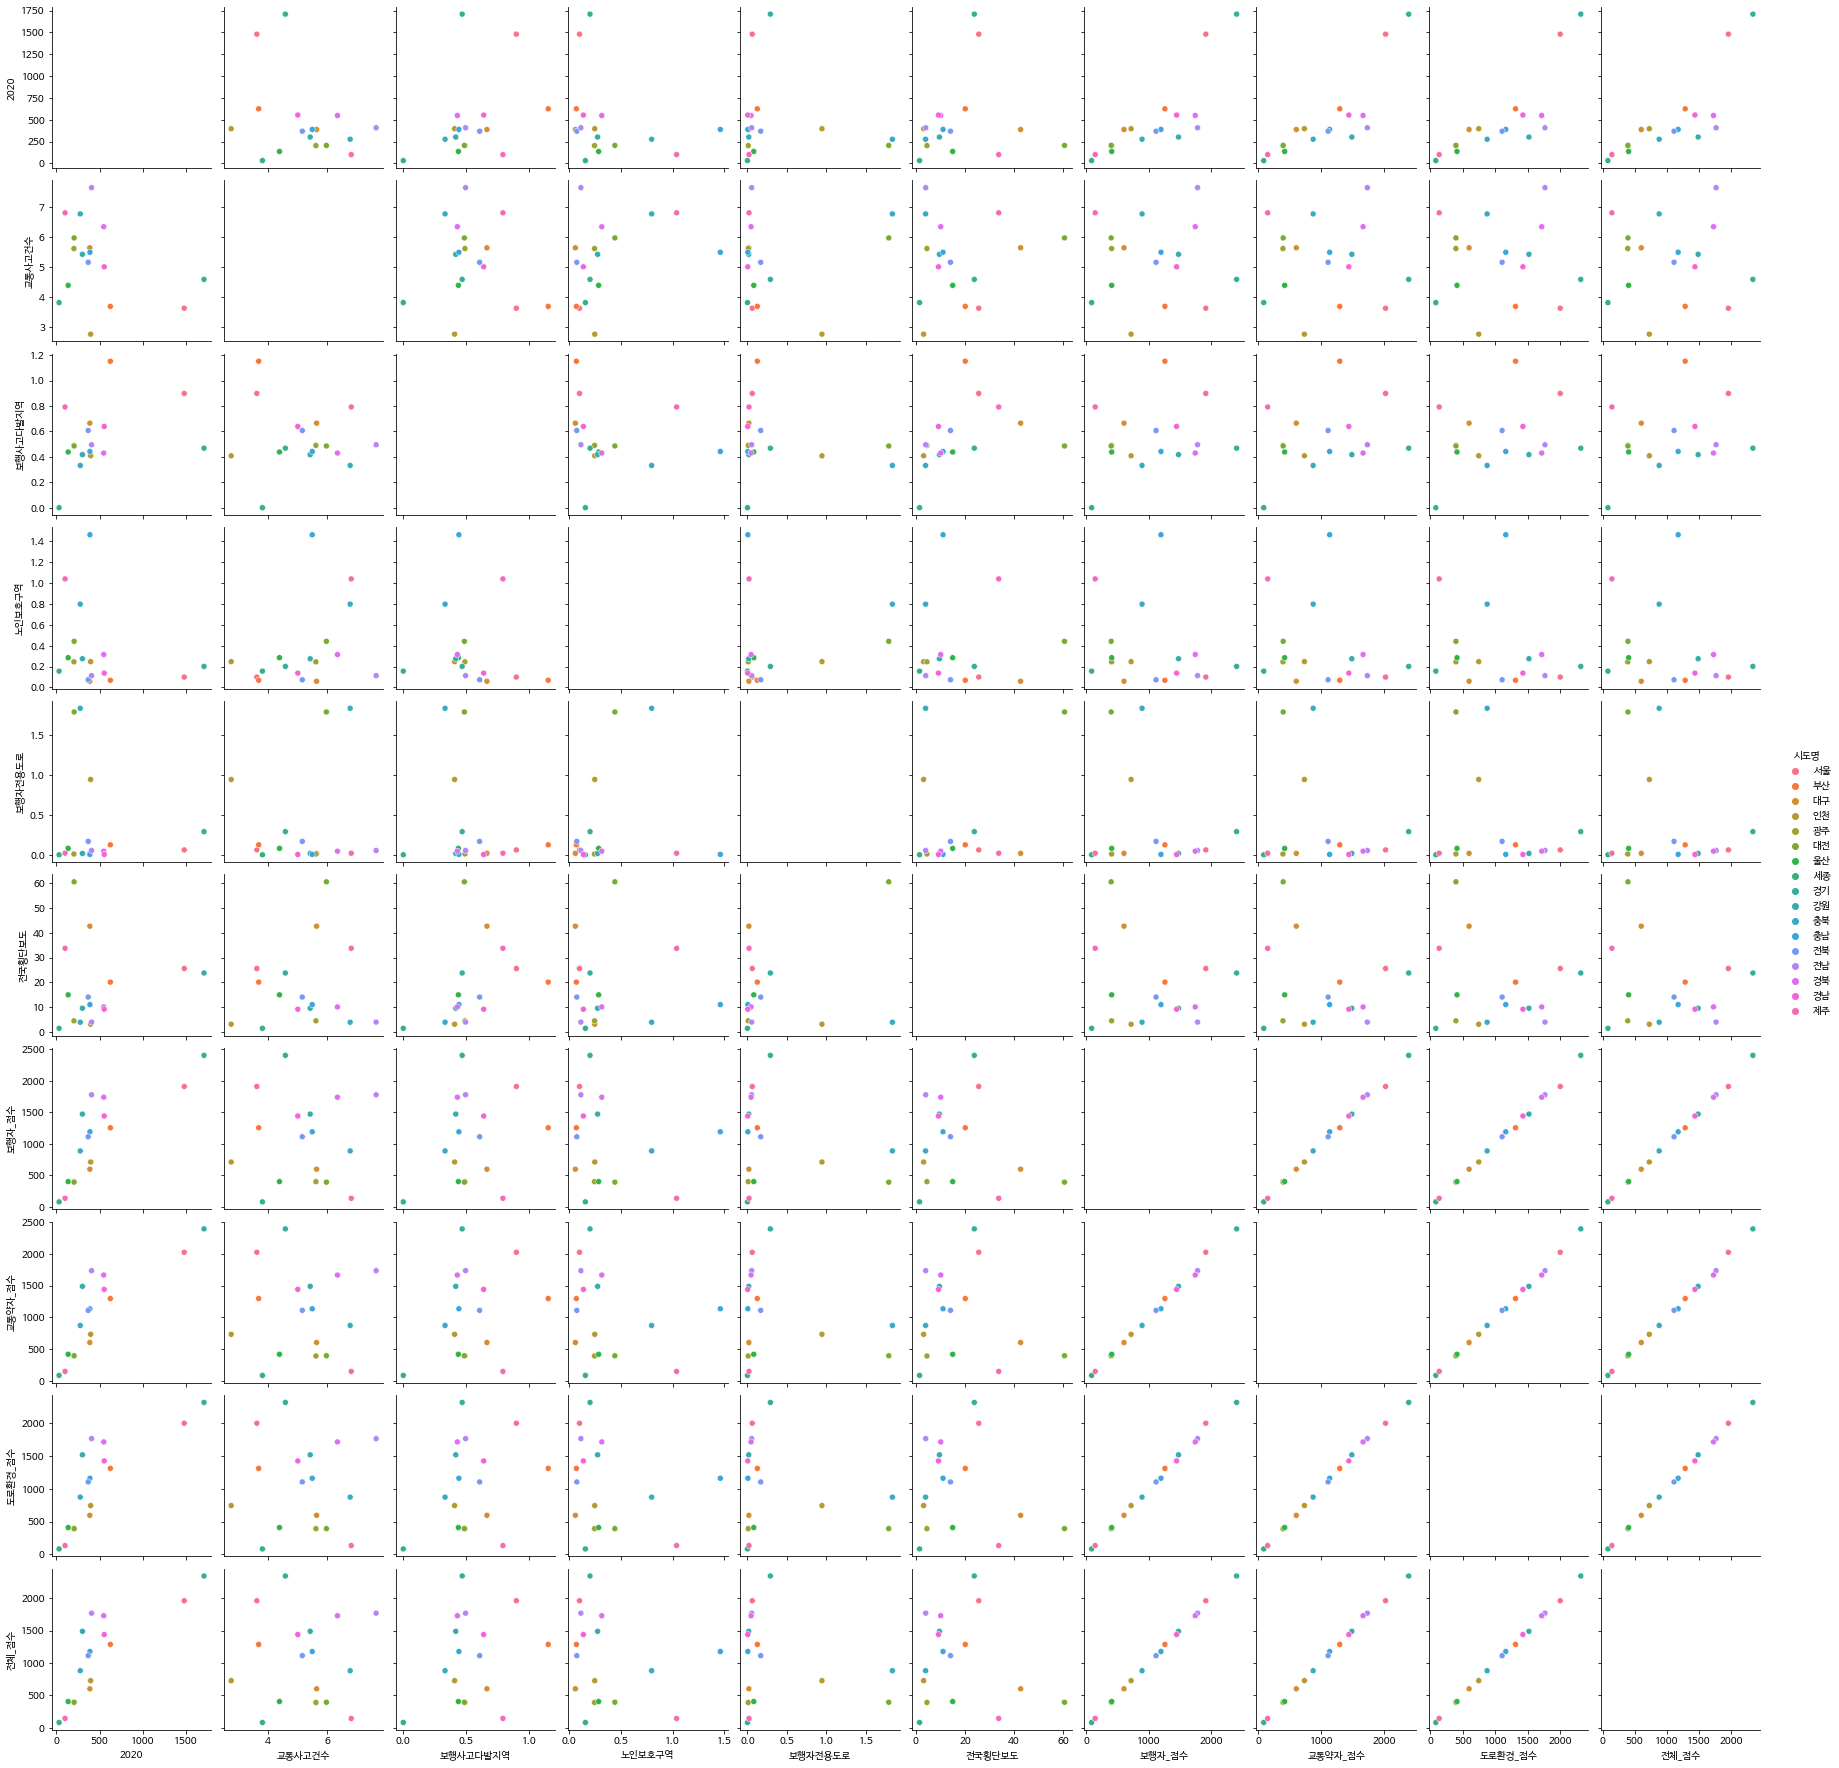

In [ ]:
sns.pairplot(elderly_df_scaling, hue="시도명", palette="husl")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


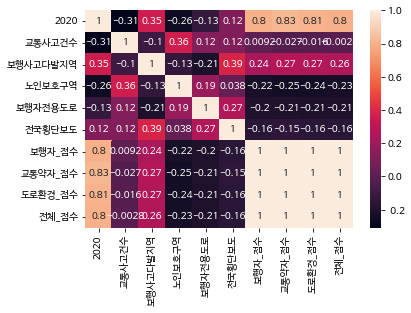

In [ ]:
elderly_df_scaling_heat = elderly_df_scaling.drop[columns = '시도명', axis = 1, inplace=True]

colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(elderly_df_scaling_heat.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

어린이 교통사고 건수

In [ ]:
children_accident = pd.read_excel('/content/drive/Shareddrives/deepDaiv/월별어린이(12세이하)교통사고.xls')
children_accident = children_accident.drop(labels=range(0,7), axis=0)
children_accident = children_accident.drop(labels=range(8,13), axis=0)
children_accident = children_accident.drop(labels=range(14,19), axis=0)
children_accident = children_accident.drop(labels=range(20,25), axis=0)
children_accident = children_accident.drop(labels=range(26,31), axis=0)
children_accident = children_accident.drop(labels=range(32,37), axis=0)
children_accident = children_accident.drop(labels=range(38,43), axis=0)
children_accident = children_accident.drop(labels=range(44,49), axis=0)
children_accident = children_accident.drop(labels=range(50,55), axis=0)
children_accident = children_accident.drop(labels=range(56,61), axis=0)
children_accident = children_accident.drop(labels=range(62,67), axis=0)
children_accident = children_accident.drop(labels=range(68,73), axis=0)
children_accident = children_accident.drop(labels=range(74,79), axis=0)
children_accident = children_accident.drop(labels=range(80,85), axis=0)
children_accident = children_accident.drop(labels=range(86,91), axis=0)
children_accident = children_accident.drop(labels=range(92,97), axis=0)
children_accident = children_accident.drop(labels=range(98,103), axis=0)
children_accident = children_accident.drop(labels=range(104,109), axis=0)
children_accident = children_accident.drop(['기준년도','2020'], axis=1)
children_accident

,시도,피해자수
7,서울,2158.0
13,부산,937.0
19,대구,1316.0
25,인천,817.0
31,광주,973.0
37,대전,696.0
43,울산,368.0
49,세종,80.0
55,경기,5672.0
61,강원,849.0


In [ ]:
# 서울
children_accident = children_accident[children_accident['시도']=='서울']
children_accident = children_accident.drop(6)
children_accident = children_accident['2020'].sum()
# 부산
children_accident = children_accident[children_accident['시도']=='부산']
children_accident = children_accident.drop(12)
children_accident = children_accident['2020'].sum()
# 대구
children_accident = children_accident[children_accident['시도']=='대구']
children_accident = children_accident.drop(18)
children_accident = children_accident['2020'].sum()
# 인천
children_accident = children_accident[children_accident['시도']=='인천']
children_accident = children_accident.drop(24)
children_accident = children_accident['2020'].sum()
# 광주
children_accident = children_accident[children_accident['시도']=='광주']
children_accident_seoul = children_accident_seoul.drop(30)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 대전
children_accident_seoul = children_accident[children_accident['시도']=='대전']
children_accident_seoul = children_accident_seoul.drop(36)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 울산
children_accident_seoul = children_accident[children_accident['시도']=='울산']
children_accident_seoul = children_accident_seoul.drop(42)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 세종
children_accident_seoul = children_accident[children_accident['시도']=='세종']
children_accident_seoul = children_accident_seoul.drop(48)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 경기
children_accident_seoul = children_accident[children_accident['시도']=='경기']
children_accident_seoul = children_accident_seoul.drop(54)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 강원
children_accident_seoul = children_accident[children_accident['시도']=='강원']
children_accident_seoul = children_accident_seoul.drop(60)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 충북
children_accident_seoul = children_accident[children_accident['시도']=='충북']
children_accident_seoul = children_accident_seoul.drop(66)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 충남
children_accident_seoul = children_accident[children_accident['시도']=='충남']
children_accident_seoul = children_accident_seoul.drop(72)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 전북
children_accident_seoul = children_accident[children_accident['시도']=='전북']
children_accident_seoul = children_accident_seoul.drop(78)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 전남
children_accident_seoul = children_accident[children_accident['시도']=='전남']
children_accident_seoul = children_accident_seoul.drop(84)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 경북
children_accident_seoul = children_accident[children_accident['시도']=='경북']
children_accident_seoul = children_accident_seoul.drop(90)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 경남
children_accident_seoul = children_accident[children_accident['시도']=='경남']
children_accident_seoul = children_accident_seoul.drop(96)
children_accident_seoul = children_accident_seoul['2020'].sum()
# 제주
children_accident_seoul = children_accident[children_accident['시도']=='제주']
children_accident_seoul = children_accident_seoul.drop(102)
children_accident_seoul = children_accident_seoul['2020'].sum()
children_accident_seoul

2158.0